# フィッシャー判別分析を実装

In [1]:
from numpy.random import randn
import numpy as np
import matplotlib.pyplot as plt
import sys,os
sys.path.append(os.pardir)
from tools.models.decomposition.fda import FDA
from tools.utils.plot.binary_data_plot import BinaryDataPlotter

In [13]:
def generate(n,seed=None,diff=4):
    np.random.seed=seed
    x_normal=randn(n,2)
    x_normal[:n//2,0] = x_normal[:n//2,0]-diff
    x_normal[n//2:,0] = x_normal[n//2:,0]+diff
    x_cluster=randn(n,2)
    x_cluster[:n//4,0] = x_cluster[:n//4,0]-diff
    x_cluster[n//4:n//2,0] = x_cluster[n//4:n//2,0]+diff
    y=np.concatenate([np.ones(n//2),-np.ones(n-n//2)])
    return x_normal,x_cluster,y

In [129]:
N=100
SEED=1

In [130]:
X_normal,X_cluster,y=generate(N,SEED)

In [131]:
plotter=BinaryDataPlotter()

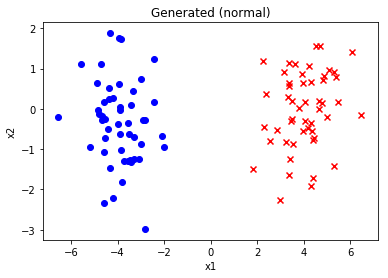

In [132]:
plotter.plot(X_normal,y,title="Generated (normal)")

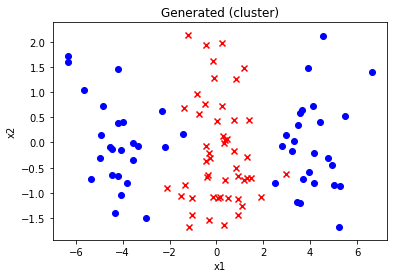

In [133]:
plotter.plot(X_cluster,y,title="Generated (cluster)")

In [134]:
model=FDA(n_components=1)

In [135]:
result_normal=model.fit(X_normal,y)[0]
result_cluster=model.fit(X_cluster,y)[0]

In [136]:
theta_normal=(0,1/result_normal[0],-1/result_normal[1])
theta_cluster=(0,1/result_cluster[0],-1/result_cluster[1])

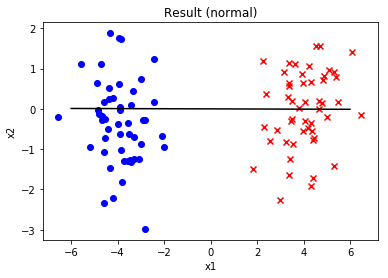

In [137]:
plotter.plot(X_normal,y,title="Result (normal)",theta=theta_normal)

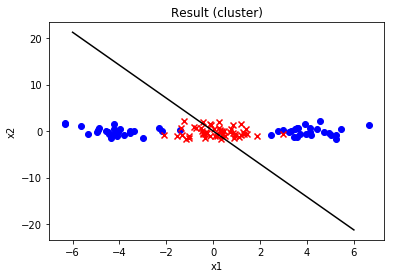

In [138]:
plotter.plot(X_cluster,y,title="Result (cluster)",theta=theta_cluster)